# 0. Imports

# 1. Exemplo 1: Com dados sint√©ticos

In [67]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_features=6,
    n_classes=2,
    n_samples=2000,
    n_informative=2,
    random_state=123,
    n_clusters_per_class=1
)

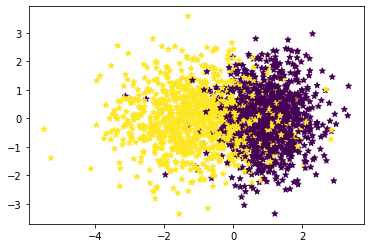

In [68]:
# Visualizando os pontos criados 
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

## Divis√£o em treino, teste e valida√ß√£o

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [70]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [71]:
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))
print('Tamanho do conjunto de valida√ß√£o: {}'.format(X_val.shape[0]))

Tamanho do conjunto de treino: 1600
Tamanho do conjunto de teste: 200
Tamanho do conjunto de valida√ß√£o: 200


## Constru√ß√£o do modelo

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
# Build a Gaussian Classifier
model = GaussianNB()

# Treinando o modelo
model.fit(X_train, y_train)

GaussianNB()

## Avalia√ß√£o do modelo

In [74]:
from sklearn.metrics import (
    accuracy_score,
    recall_score, 
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

In [75]:
# M√©tricas no conjunto de valida√ß√£o
y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
rec_val = recall_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val)

print('Acur√°cia no conjunto de valida√ß√£o: {}'.format(acc_val))
print('Recall no conjunto de valida√ß√£o: {}'.format(rec_val))
print('Precis√£o no conjunto de valida√ß√£o: {}'.format(prec_val))

Acur√°cia no conjunto de valida√ß√£o: 0.94
Recall no conjunto de valida√ß√£o: 0.8709677419354839
Precis√£o no conjunto de valida√ß√£o: 1.0


In [76]:
# se quisermos ver a matriz de confus√£o
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

[[107   0]
 [ 12  81]]


Text(0, 0.5, 'R√≥tulos Verdadeiros')

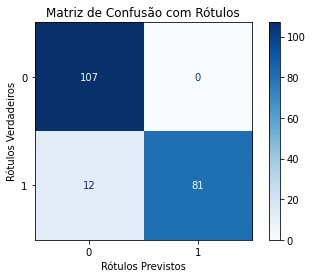

In [77]:
# Opcional: Plotar a matriz de confus√£o com r√≥tulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues')
disp.ax_.set_title('Matriz de Confus√£o com R√≥tulos')
disp.ax_.set_xlabel('R√≥tulos Previstos')
disp.ax_.set_ylabel('R√≥tulos Verdadeiros')

**‚Ü™Ô∏è Interpreta√ß√£o**

- Uma acur√°cia de 0.94 significa que 94% das previs√µes feitas pelo modelo estavam corretas. Em outras palavras, o modelo acertou 94 em cada 100 amostras.
-  Um recall de 1.0 significa que o modelo identificou corretamente todos os casos positivos presentes no conjunto de valida√ß√£o. Em outras palavras, n√£o houve falsos negativos, ou seja, o modelo n√£o deixou de identificar nenhum caso positivo.
- Uma precis√£o de aproximadamente 0.87 significa que, entre todas as amostras que o modelo previu como positivas, 87% estavam corretas. Em outras palavras, 13% das previs√µes positivas do modelo foram falsos positivos (casos que o modelo previu como positivos, mas que na verdade n√£o eram).

**‚Ü™Ô∏è Contextualiza√ß√£o dos Resultados**

> üí° Alta Acur√°cia (0.94): O modelo est√° geralmente correto na maioria das suas previs√µes.

> üí° Recall Perfeito (1.0): O modelo n√£o perdeu nenhum caso positivo, o que √© muito importante em contextos onde identificar todos os positivos √© crucial, como em diagn√≥sticos m√©dicos para doen√ßas graves.

> üí° Boa Precis√£o (0.87): A maioria das previs√µes positivas do modelo s√£o corretas, mas h√° alguns falsos positivos. Dependendo do contexto, falsos positivos podem ser aceit√°veis ou problem√°ticos. Por exemplo, em um teste m√©dico, falsos positivos podem levar a exames adicionais desnecess√°rios, mas s√£o menos cr√≠ticos do que falsos negativos.

In [78]:
# M√©tricas no conjunto de teste
y_pred_test = model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)
rec_test = recall_score(y_pred_test, y_test)
prec_test = precision_score(y_pred_test, y_test)

print('Acur√°cia no conjunto de teste: {}'.format(acc_test))
print('Recall no conjunto de teste: {}'.format(rec_test))
print('Precis√£o no conjunto de teste: {}'.format(prec_test))

Acur√°cia no conjunto de teste: 0.97
Recall no conjunto de teste: 1.0
Precis√£o no conjunto de teste: 0.9381443298969072


In [79]:
report = classification_report(y_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       109
           1       0.94      1.00      0.97        91

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



> üí° A acur√°cia √© ligeiramente maior no conjunto de teste (97%) em compara√ß√£o com o conjunto de valida√ß√£o (94%). Isso significa que o modelo est√° acertando um pouco mais no conjunto de teste. A diferen√ßa n√£o √© muito grande, indicando que o modelo tem um bom desempenho consistente, mas pode haver uma leve varia√ß√£o devido a diferentes subconjuntos de dados usados na valida√ß√£o e no teste.

> üí° O recall √© perfeito (1.0) em ambos os conjuntos. Isso significa que, em ambos os casos, o modelo identificou todos os casos positivos corretamente, sem deixar nenhum verdadeiro positivo de fora. Esta √© uma caracter√≠stica muito positiva, especialmente em contextos cr√≠ticos onde perder um caso positivo pode ser muito prejudicial.

> üí° A precis√£o √© um pouco maior no conjunto de teste (aproximadamente 93.8%) em compara√ß√£o com o conjunto de valida√ß√£o (aproximadamente 87.1%). Isso indica que, no conjunto de teste, a maioria das previs√µes positivas s√£o corretas, com menos falsos positivos em compara√ß√£o com o conjunto de valida√ß√£o. Uma maior precis√£o no conjunto de teste sugere que o modelo √© mais assertivo em suas previs√µes positivas nesse conjunto.


> üí° Consist√™ncia entre conjuntos: As m√©tricas s√£o relativamente consistentes entre os conjuntos de teste e valida√ß√£o, sugerindo que o modelo tem um desempenho est√°vel e generaliza bem para dados n√£o vistos.

> üí° No geral, o modelo parece robusto e capaz de generalizar bem para novos dados, com desempenho consistente e alta capacidade de identificar corretamente os casos positivos.

# 2. Exemplo 2: Importando dados em .csv

In [80]:
# Salvando os dados em csv
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Carregar o conjunto de dados Breast Cancer
data = load_breast_cancer()

# Criar um DataFrame a partir dos dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Salvar o DataFrame em um arquivo CSV
df.to_csv('breast_cancer.csv', index=False)

In [95]:
import pandas as pd

# Carregar o DataFrame do arquivo CSV
df = pd.read_csv('breast_cancer.csv')

df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [82]:
df.shape

(569, 31)

In [96]:
# Separar as caracter√≠sticas (X) e o alvo (y)
X = df.drop('target', axis=1)
y = df['target']

In [84]:
# Verificar os dados
X.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [85]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [86]:
X.shape

(569, 30)

In [87]:
y.shape

(569,)

## Divis√£o em treino, teste e valida√ß√£o

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [98]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [99]:
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))
print('Tamanho do conjunto de valida√ß√£o: {}'.format(X_val.shape[0]))

Tamanho do conjunto de treino: 455
Tamanho do conjunto de teste: 57
Tamanho do conjunto de valida√ß√£o: 57


## Constru√ß√£o do modelo

In [100]:
# Build a Gaussian Classifier
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

GaussianNB()

## Avalia√ß√£o do modelo

In [102]:
# M√©tricas no conjunto de valida√ß√£o
y_pred_val = gnb.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
rec_val = recall_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val)

print('Acur√°cia no conjunto de valida√ß√£o: {}'.format(acc_val))
print('Recall no conjunto de valida√ß√£o: {}'.format(rec_val))
print('Precis√£o no conjunto de valida√ß√£o: {}'.format(prec_val))

Acur√°cia no conjunto de valida√ß√£o: 0.9649122807017544
Recall no conjunto de valida√ß√£o: 1.0
Precis√£o no conjunto de valida√ß√£o: 0.95


In [103]:
len(y_val)

57

In [104]:
# Matriz de confus√£o
matriz_con = confusion_matrix(y_val, y_pred_val)
print(matriz_con)

[[17  2]
 [ 0 38]]


Text(0, 0.5, 'R√≥tulos Verdadeiros')

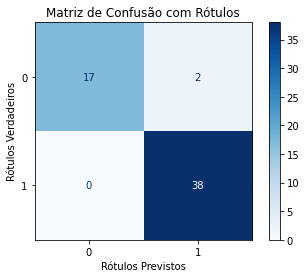

In [106]:
# Opcional: Plotar a matriz de confus√£o com r√≥tulos
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_con, display_labels=['0', '1'])
disp.plot(cmap='Blues')
disp.ax_.set_title('Matriz de Confus√£o com R√≥tulos')
disp.ax_.set_xlabel('R√≥tulos Previstos')
disp.ax_.set_ylabel('R√≥tulos Verdadeiros')

# Exerc√≠cio

- Refa√ßa os passos dos treinamentos do naive bayes anteriores, s√≥ que dessa vez n√£o divida em conjunto de valida√ß√£o, por termos poucos dados. Muda a a propor√ß√£o de treino e teste para 70% / 30% e reporte as m√©tricas encontradas no conjunto de treino e de teste. 